# Predicción de gastos mensuales para cada grupo demográfico
#### JJD-Predictors

In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## Predicción de gastos mensuales en pago de deudas

In [24]:
clustered_clients_demog = pd.read_pickle("./clustered_clients_demog.pkl")
clustered_clients_demog

,id_cliente,grupo
307765,1,2
30636,2,0
107698,3,0
15429,5,0
46053,7,0
184383,8,2
246301,9,0
123121,10,0
153945,11,1
61373,12,0


In [25]:
#data_transactions_categorized = pd.read_pickle("./transactions_with_category.pkl")
data_transactions_categorized = pd.read_pickle("C:/Users/alejo/Documents/Docs.U_Locales/Dataton/transactions_classified_ligera_StemmingSVM.pkl")
#data_transactions_categorized = pd.read_pickle("./transactions_BC.pkl")
data_transactions_categorized

,id_trn_ach,id_cliente,fecha,hora,valor_trx,ref,clasificacion
0,282076350,26,2017-09-14,07:00,100277.45,# conjunt residencial pietr sant ph,Hogar
1,300800637,26,2017-12-12,15:21,165877.09,# conjunt residencial pietr sant ph,Hogar
2,323702677,27051,2018-03-22,14:14,175427.29,# conjunt residencial pietr sant ph,Hogar
3,269070032,56595,2017-07-10,09:05,128522.15,# conjunt residencial pietr sant ph,Hogar
4,331356351,182705,2018-04-21,10:34,101490.59,# conjunt residencial pietr sant ph,Hogar
5,331604468,27051,2018-04-23,11:25,176659.40,# conjunt residencial pietr sant ph,Hogar
6,218822221,56474,2016-09-22,18:20,170950.49,# conjunt residencial pietr sant ph,Hogar
7,263771701,56474,2017-06-12,11:42,185775.31,# conjunt residencial pietr sant ph,Hogar
8,246784317,82153,2017-03-13,08:13,123680.42,# conjunt residencial pietr sant ph,Hogar
9,294130487,82153,2017-11-14,11:16,125534.52,# conjunt residencial pietr sant ph,Hogar


### Obtener transacciones de pago de deudas

In [26]:
data_transactions_debts = data_transactions_categorized.loc[data_transactions_categorized["clasificacion"]=='Pago de Deudas']
#data_transactions_debts = data_transactions_categorized
data_transactions_debts

,id_trn_ach,id_cliente,fecha,hora,valor_trx,ref,clasificacion
164534,361509417,165,2018-08-16,15:34,145451.43,recaud pse traspas vis,Pago de Deudas
164535,242588398,52940,2017-02-16,21:18,152257.97,recaud pse traspas vis,Pago de Deudas
164536,254326490,188376,2017-04-24,06:47,159686.86,recaud pse traspas vis,Pago de Deudas
164537,319890300,189269,2018-03-07,08:03,161711.74,recaud pse traspas vis,Pago de Deudas
164538,263638913,309810,2017-06-11,13:21,156801.44,recaud pse traspas vis,Pago de Deudas
164539,236908518,33979,2017-01-17,10:19,157314.67,recaud pse traspas vis,Pago de Deudas
164540,308815229,188376,2018-01-19,08:40,159072.66,recaud pse traspas vis,Pago de Deudas
164541,243510272,228994,2017-02-23,10:21,158121.52,recaud pse traspas vis,Pago de Deudas
164542,359948298,1037,2018-08-10,17:10,143435.92,recaud pse traspas vis,Pago de Deudas
164543,367741700,1430,2018-09-10,10:32,148150.72,recaud pse traspas vis,Pago de Deudas


In [878]:
data_transactions_debts.id_cliente = data_transactions_debts.id_cliente.apply(pd.to_numeric)
data_transactions_debts.info()

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


<class 'pandas.core.frame.DataFrame'>
Int64Index: 921209 entries, 164534 to 8149124
Data columns (total 7 columns):
id_trn_ach       921209 non-null object
id_cliente       921209 non-null int64
fecha            921209 non-null datetime64[ns]
hora             921209 non-null object
valor_trx        921209 non-null float64
ref              921209 non-null object
clasificacion    921209 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 56.2+ MB


In [28]:
data_clients_group_demog = pd.merge(data_transactions_debts,clustered_clients_demog, on = 'id_cliente' ) #Hacer merge de transacciones con su respectivo grupo
data_clients_group_demog = data_clients_group_demog.groupby(['grupo'])

### Grupo 0

#### Transacciones mensuales por cliente

In [29]:
trans_group0 = data_clients_group_demog.get_group(0)
trans_group0

,id_trn_ach,id_cliente,fecha,hora,valor_trx,ref,clasificacion,grupo
7,263638913,309810,2017-06-11,13:21,156801.44,recaud pse traspas vis,Pago de Deudas,0
8,263948060,309810,2017-06-12,22:59,152635.55,recaud pse re,Pago de Deudas,0
9,236908518,33979,2017-01-17,10:19,157314.67,recaud pse traspas vis,Pago de Deudas,0
10,367145226,33979,2018-09-07,09:32,154079.68,recaud pse traspas vis,Pago de Deudas,0
11,315589149,33979,2018-02-17,11:59,156868.71,recaud pse traspas vis,Pago de Deudas,0
12,236551211,33979,2017-01-15,13:16,153701.22,recaud pse traspas vis,Pago de Deudas,0
13,243850721,33979,2017-02-25,12:28,376056.93,recaud pse nacional adopcion,Pago de Deudas,0
14,217801106,33979,2016-09-15,16:17,156412.90,recaud pse tp,Pago de Deudas,0
15,235914873,33979,2017-01-11,15:12,147734.72,recaud pse tp,Pago de Deudas,0
16,276588649,33979,2017-08-16,21:40,154915.87,recaud pse tp,Pago de Deudas,0


In [521]:
print("Maximo de transacciones por mes para cada cliente:")
trans_group0.groupby(['id_cliente',pd.Grouper(key='fecha', freq='1M')]).valor_trx.value_counts().max()

Maximo de transacciones por mes para cada cliente:


2

##### Cálculo del gasto mensual por cliente en pago de deudas

In [767]:
month_expenses0_client = trans_group0.groupby(['id_cliente',pd.Grouper(key='fecha', freq='1M')]).valor_trx.sum().reset_index() #Calcular gastos mensuales de cada cliente

##### Detección de datos atípicos en el gasto mensual por cliente

In [31]:
def outlier_detection(df, column_name):
    q3=df[column_name].quantile(0.75)
    q1=df[column_name].quantile(0.25)
    IQR=q3-q1
    a=q1-1.5*(IQR)
    b=q3+1.5*(IQR)
    df_f =df.loc[(df[column_name]>a)&(df[column_name]<=b)]
    return df_f

{'whiskers': [<matplotlib.lines.Line2D at 0x201b705da90>,
 'caps': [<matplotlib.lines.Line2D at 0x201b705deb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x201b705d668>],
 'medians': [<matplotlib.lines.Line2D at 0x201b70637f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x201b7063b38>],
 'means': []}

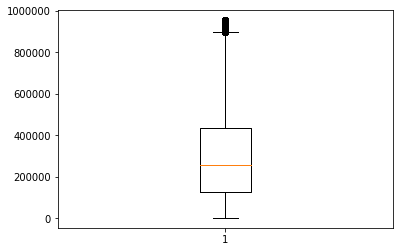

In [32]:
month_expenses0_client = outlier_detection(month_expenses0_client, "valor_trx")
expenses = month_expenses0_client["valor_trx"]
plt.boxplot(expenses, showfliers = True)

##### Matriz de gasto mensual por cliente

In [33]:
month_expenses_group0 = month_expenses0_client.pivot(index='id_cliente', columns='fecha', values='valor_trx') #Crear matriz clienteXmes
month_expenses_group0.columns = month_expenses_group0.columns.strftime('%b/%Y') #Convertir fecha a formato mes/YYYY
month_expenses_group0 = month_expenses_group0.fillna(0) #Cuando un cliente no hizo transacciones en un mes, la casilla se llena con un cero
month_expenses_group0

,Sep/2016,Oct/2016,Nov/2016,Dec/2016,Jan/2017,Feb/2017,Mar/2017,Apr/2017,May/2017,Jun/2017,...,Jan/2018,Feb/2018,Mar/2018,Apr/2018,May/2018,Jun/2018,Jul/2018,Aug/2018,Sep/2018,Oct/2018
id_cliente,,,,,,,,,,,,,,,,,,,,,
40,528425.99,179317.94,645164.22,668228.90,197888.28,202606.32,384780.44,0.00,210980.32,200098.10,...,203578.50,206568.03,644170.42,331378.60,0.00,888131.25,202139.45,213593.37,660663.83,0.00
48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4859.75,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
49,550174.21,508430.95,130155.47,326584.85,302341.92,0.00,736468.82,0.00,501389.49,0.00,...,112899.84,76273.91,0.00,230363.55,507217.50,441756.87,744592.63,853938.06,546815.00,0.00
54,94855.77,0.00,0.00,0.00,137716.88,140899.90,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,135198.08,159065.07,187945.15,0.00,0.00,185912.95,0.00
57,49973.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,227100.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,232002.90,0.00
66,129800.63,0.00,26579.41,0.00,242712.79,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
69,101665.32,198407.19,104376.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,152939.56,0.00,0.00


#### Filtrado de clientes por número de meses con transacciones

In [856]:
month_diff0_thres = 24

In [857]:
thresh_mask0 = month_expenses_group0.astype(bool).sum(axis=1) >= month_diff0_thres #Obtiene numero de meses con gasto diferente de 0 para cada cliente
month_expenses_filtered0 = month_expenses_group0[thresh_mask0]
month_expenses_filtered0

,Sep/2016,Oct/2016,Nov/2016,Dec/2016,Jan/2017,Feb/2017,Mar/2017,Apr/2017,May/2017,Jun/2017,...,Jan/2018,Feb/2018,Mar/2018,Apr/2018,May/2018,Jun/2018,Jul/2018,Aug/2018,Sep/2018,Oct/2018
id_cliente,,,,,,,,,,,,,,,,,,,,,
521,534850.01,293938.91,352606.50,344401.96,306255.32,381990.25,267094.11,288079.27,437676.82,235730.27,...,112480.84,125631.77,117843.28,97011.60,108173.13,0.00,103214.86,100160.29,80955.53,0.0
3141,667186.96,695661.32,678682.35,681938.44,704663.52,685749.94,713580.42,309272.14,299319.47,706459.55,...,714521.47,770176.88,750118.47,742150.34,724114.56,747730.28,747763.19,723838.47,739777.47,0.0
3774,375865.22,148140.80,483523.92,245993.74,150117.79,155243.93,255021.54,163398.53,201042.55,246268.26,...,189352.16,181557.46,303508.27,185440.98,186348.49,232356.49,240897.66,221634.30,372405.28,0.0
4360,164345.09,181335.20,0.00,181799.04,197030.81,191879.03,201159.22,272839.45,537132.00,498081.02,...,220983.21,231960.39,392907.07,375182.07,398755.15,233381.87,223065.76,230254.69,224523.23,0.0
4541,162088.95,179212.63,158381.44,157992.98,329541.22,161563.51,153065.78,166457.61,479390.33,307571.86,...,398692.68,480257.15,34629.11,54893.28,160264.14,51922.22,81443.06,193100.04,260576.15,0.0
4810,0.00,118575.56,110930.74,117378.70,127885.33,130024.43,133571.35,136661.00,136992.33,137765.94,...,132789.32,145245.37,142647.55,145362.79,149661.80,144643.78,143910.51,148188.29,148632.60,0.0
5849,207987.71,205092.63,203684.55,545492.59,216423.51,222985.92,218497.24,218466.16,224342.98,417410.50,...,259587.61,255746.56,259211.24,254936.05,253327.71,254590.43,244542.03,0.00,295361.75,0.0
6259,68931.99,70419.40,145747.91,133778.26,137134.20,257003.70,462667.24,607492.54,469141.62,493846.31,...,163381.07,167639.31,311544.91,373976.26,169500.30,316439.86,204157.36,180859.45,120904.18,0.0
6397,198913.46,191339.36,191192.23,198681.64,214243.89,171222.68,223366.43,207782.88,204309.21,201860.55,...,285364.38,213982.64,221974.35,261235.90,251964.05,236570.74,239111.07,234463.31,241846.58,0.0


#### Gasto promedio mensual del grupo

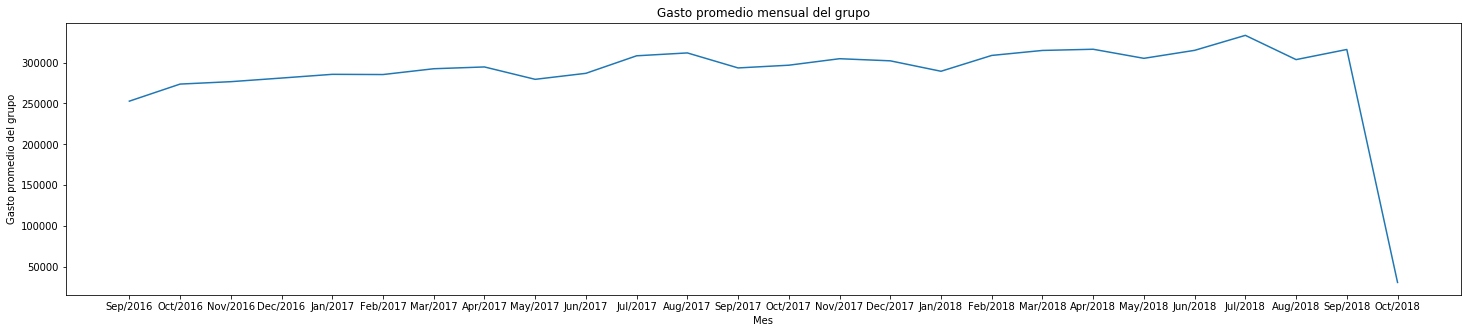

In [858]:
plt.figure(figsize=(25,5))
plt.plot(month_expenses_filtered0.mean())
plt.xlabel('Mes')
plt.ylabel('Gasto promedio del grupo')
plt.title('Gasto promedio mensual del grupo')
plt.show()

#### Construcción del dataset

Se tomarán los meses entre _sep/2017_ y _sep/2018_, ya que son para los que se tienen datos del mes anterior. _oct/2018_ no cuenta con suficientes transacciones.

In [859]:
month_expenses_filtered0_arr = np.array(month_expenses_filtered0)
total_expenses_dataset0_in = []
total_expenses_dataset0_out = []
for client in month_expenses_filtered0_arr:
    """"""
    for i in range(12, 25): #Se toma desde sep/2017 hasta sep/2018
        #Toma desde tres meses antes hasta uno antes (el slicing es abierto a la derecha). Ademas, concatena el mismo mes del anio anterior
        total_expenses_dataset0_in.append(np.concatenate((client[i-3:i],client[i-12]), axis=None))
        #total_expenses_dataset0_in.append(client[i-12:i])
        total_expenses_dataset0_out.append(client[i])
    
    #total_expenses_dataset0_in.append(client[0:24])
    #total_expenses_dataset0_out.append(client[24])
    #break

In [860]:
total_expenses_dataset0_in = np.array(total_expenses_dataset0_in)

In [861]:
total_expenses_dataset0_out = np.array(total_expenses_dataset0_out)


In [862]:
print("Número de muestras:")

len(total_expenses_dataset0_in) #No. clientes x 13 (no. meses tomados)

Número de muestras:


4199

##### Escalado de datos a un rango de 0 a 1

In [863]:
from sklearn.preprocessing import MinMaxScaler

scalerIn = MinMaxScaler()
scalerOut = MinMaxScaler()

total_exp_dset0_in_scaled = scalerIn.fit_transform(total_expenses_dataset0_in) #Escala los datos de cada caracteristica a un rango de 0 a 1
total_exp_dset0_out_scaled = scalerOut.fit_transform(total_expenses_dataset0_out.reshape(-1, 1)) #Escala los datos de cada caracteristica a un rango de 0 a 1

#total_exp_dset0_in_scaled = total_expenses_dataset0_in
#total_exp_dset0_out_scaled = total_expenses_dataset0_out

##### División en conjuntos de entrenamiento y pruebas

In [864]:
from sklearn.model_selection import train_test_split

total_exp_dset0_in_train, total_exp_dset0_in_test, total_exp_dset0_out_train, total_exp_dset0_out_test = train_test_split(total_exp_dset0_in_scaled, total_exp_dset0_out_scaled, test_size=0.25, random_state=42)

#### Implementación del método de predicción

Se probaron diferentes tipos de regresores como _Stochastic Gradient Descent_, _Ridge_ y máquinas de vectores de soporte con diferentes tipos de _kernel_. Sin embargo, el perceptrón multicapa y la regresión lineal fueron los que mejores resultados dieron.

Se decidió usar el modelo de perceptrón multicapa como modelo definitivo para este grupo y los dos restantes.

##### Regresión usando perceptrón multicapa

In [865]:
from sklearn.neural_network import MLPRegressor

mlpReg = MLPRegressor(hidden_layer_sizes=(3,), activation='logistic', learning_rate='invscaling', early_stopping=True,
                     max_iter=400)
mlpReg.fit(total_exp_dset0_in_scaled, total_exp_dset0_out_scaled.ravel())

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(3,), learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=400, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

###### Evaluación del modelo

In [866]:
print("R2 Score:")

mlpReg.score(total_exp_dset0_in_test, total_exp_dset0_out_test)

#scores = [mlpRegs[i].score(total_exp_dset0_in_test, total_exp_dset0_out_test) for i in range(len(mlpRegs))]

R2 Score:


0.33980779456658683

In [867]:
#Predicciones para set de prueba

mlp_predictions = mlpReg.predict(total_exp_dset0_in_test)

In [868]:
from sklearn.metrics import explained_variance_score

print("Explained Variance Score:")
explained_variance_score(total_exp_dset0_out_test, mlp_predictions)

Explained Variance Score:


0.34046453955539113

In [869]:
from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error:")
print(scalerOut.inverse_transform(mean_absolute_error(total_exp_dset0_out_test, mlp_predictions).reshape(1,-1)))
#mean_absolute_error(total_exp_dset0_out_test, mlp_predictions).reshape(1,-1)

Mean Absolute Error:
[[117188.840505]]


In [870]:
total_exp0_out_test_unscaled = scalerOut.inverse_transform(total_exp_dset0_out_test.reshape(-1, 1))
mlp_predictions_unscaled = scalerOut.inverse_transform(mlp_predictions.reshape(-1, 1))

#Ordenar los valores reales y las predicciones de acuerdo a los valores reales
sorting_indexes = np.argsort(total_exp0_out_test_unscaled.ravel()) #Obtener indices de ordenamiento de valores reales
total_exp0_out_test_unscaled = np.array(total_exp0_out_test_unscaled)[sorting_indexes].ravel() #Ordenar valores reales
mlp_predictions_unscaled = np.array(mlp_predictions_unscaled)[sorting_indexes].ravel() #Ordenar predicciones

#Calcular distribución del error absoluto
dist_abs_error = abs( np.subtract(total_exp0_out_test_unscaled, mlp_predictions_unscaled) )

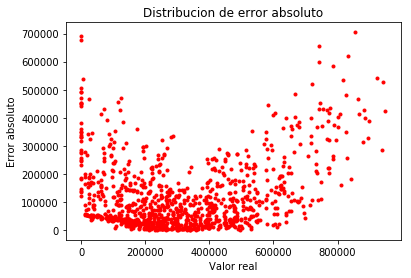

In [871]:
#Graficar distribución del error absoluto

plt.plot(total_exp0_out_test_unscaled, dist_abs_error, 'r.')
plt.xlabel('Valor real')
plt.ylabel('Error absoluto')
plt.title('Distribucion de error absoluto')
plt.show()

Text(0.5, 1.0, 'Histograma de error absoluto')

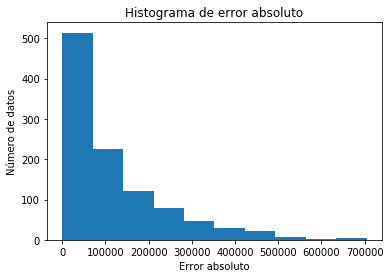

In [872]:
plt.hist(dist_abs_error)#, bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000], align='left')
plt.xlabel('Error absoluto')
plt.ylabel('Número de datos')
plt.title('Histograma de error absoluto')

In [873]:
max_error_index = np.argmax(dist_abs_error)
print("Error Absoluto Máximo:")
print(dist_abs_error.max())
print("Gasto real correspondiente al error absoluto máximo:")
print(total_exp0_out_test_unscaled[max_error_index])
print("Predicción correspondiente al error absoluto máximo:")
print(mlp_predictions_unscaled[max_error_index])

Error Absoluto Máximo:
704745.3623580209
Gasto real correspondiente al error absoluto máximo:
854112.47
Predicción correspondiente al error absoluto máximo:
149367.1076419791


In [874]:
#Calculo de RPD (Relative Percent Difference)

RPD = 2 * np.divide( np.subtract(total_exp0_out_test_unscaled, mlp_predictions_unscaled), np.add(abs(total_exp0_out_test_unscaled), abs(mlp_predictions_unscaled)) )

print("RPD Medio:")
print(RPD.mean())
print("RPD Absoluto Medio:")
print(abs(RPD).mean())

RPD Medio:
-0.17935268575922914
RPD Absoluto Medio:
0.4371259955618578


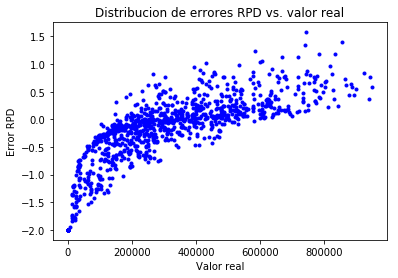

In [875]:
plt.plot(total_exp0_out_test_unscaled, RPD, 'b.')
plt.xlabel('Valor real')
plt.ylabel('Error RPD')
plt.title('Distribucion de errores RPD vs. valor real')
plt.show()

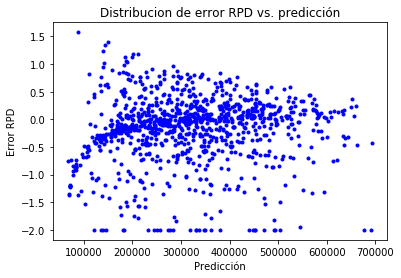

In [876]:
plt.plot(np.sort(mlp_predictions_unscaled), RPD[np.argsort(mlp_predictions_unscaled)], 'b.')
plt.xlabel('Predicción')
plt.ylabel('Error RPD')
plt.title('Distribucion de error RPD vs. predicción')
plt.show()

Text(0.5, 1.0, 'Histograma de error RPD')

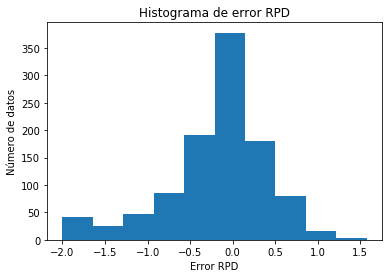

In [877]:
plt.hist(RPD)#, bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000], align='left')
plt.xlabel('Error RPD')
plt.ylabel('Número de datos')
plt.title('Histograma de error RPD')

##### Regresión lineal

Este modelo sirve como prueba y punto de comparación con la red neuronal.

In [677]:
#from sklearn.svm import SVR

#svr_rbf0 = SVR(kernel='linear', gamma='auto')
#svr_rbf0 = svr_rbf0.fit(total_exp_dset0_in_train, total_exp_dset0_out_train.ravel())

In [678]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor

linreg = LinearRegression()
#linreg = Ridge(fit_intercept=True, alpha=0.05)
#linreg = SGDRegressor()#(penalty='l2', alpha=0.15, max_iter=200)
linreg = linreg.fit(total_exp_dset0_in_train, total_exp_dset0_out_train.ravel())
linreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

###### Evaluación del modelo

In [679]:
print("R2 Score:")

linreg.score(total_exp_dset0_in_test, total_exp_dset0_out_test)

R2 Score:


0.33174883094354535

In [680]:
#Predicciones para set de prueba

linreg_predictions = linreg.predict(total_exp_dset0_in_test)

In [681]:
from sklearn.metrics import explained_variance_score

print("Explained Variance Score:")

explained_variance_score(total_exp_dset0_out_test, linreg_predictions)

Explained Variance Score:


0.3327924319888511

In [682]:
from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error:")

print(scalerOut.inverse_transform(mean_absolute_error(total_exp_dset0_out_test, linreg_predictions).reshape(1,-1)))
#mean_absolute_error(total_exp_dset0_out_test, mlp_predictions).reshape(1,-1)

Mean Absolute Error:
[[99642.00255253]]


In [683]:
linreg_predictions_unscaled = scalerOut.inverse_transform(linreg_predictions.reshape(-1, 1))

#Ordenar las predicciones de acuerdo a los valores reales
linreg_predictions_unscaled = np.array(linreg_predictions_unscaled)[sorting_indexes].ravel() #Ordenar predicciones

#Calcular distribución del error absoluto
dist_abs_error_lin = abs( np.subtract(total_exp0_out_test_unscaled, linreg_predictions_unscaled) )

dist_abs_error_lin
#total_exp0_out_test_unscaled
#mlp_predictions_unscaled

array([252561.4009105 , 218836.87674395, 295175.024129  , ...,
       188883.49109568, 427833.24032675, 344700.13007305])

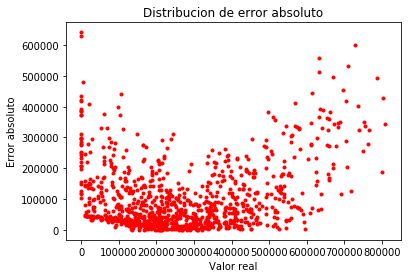

In [727]:
#Graficar distribución del error absoluto

plt.plot(total_exp0_out_test_unscaled, dist_abs_error_lin, 'r.')
plt.xlabel('Valor real')
plt.ylabel('Error absoluto')
plt.title('Distribucion de error absoluto')
plt.show()

Text(0.5, 1.0, 'Histograma de error absoluto')

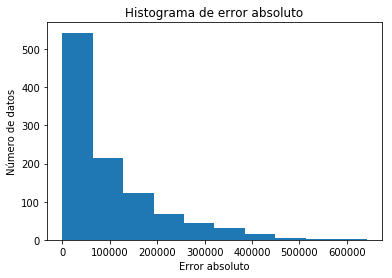

In [685]:
plt.hist(dist_abs_error_lin)#, bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000], align='left')
plt.xlabel('Error absoluto')
plt.ylabel('Número de datos')
plt.title('Histograma de error absoluto')

In [686]:
RPD_lin = 2 * np.divide( np.subtract(total_exp0_out_test_unscaled, linreg_predictions_unscaled), np.add(abs(total_exp0_out_test_unscaled), abs(linreg_predictions_unscaled)) )

print("RPD Medio:")
print(RPD_lin.mean())
print("RPD Absoluto Medio:")
print(abs(RPD_lin).mean())

RPD Medio:
-0.18046006756880906
RPD Absoluto Medio:
0.43661634704234764


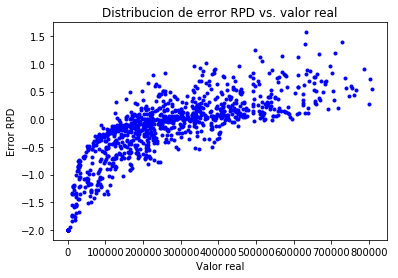

In [733]:
plt.plot(total_exp0_out_test_unscaled, RPD_lin, 'b.')
plt.xlabel('Valor real')
plt.ylabel('Error RPD')
plt.title('Distribucion de error RPD vs. valor real')
plt.show()

Text(0.5, 1.0, 'Histograma de errores RPD')

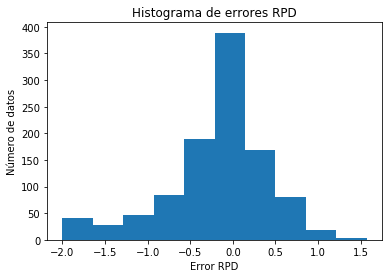

In [688]:
plt.hist(RPD_lin)#, bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000], align='left')
plt.xlabel('Error RPD')
plt.ylabel('Número de datos')
plt.title('Histograma de errores RPD')

### Grupo 1

#### Transacciones mensuales por cliente

In [689]:
trans_group1 = data_clients_group_demog.get_group(1)

In [690]:
print("Maximo de transacciones por mes para cada cliente:")
trans_group1.groupby(['id_cliente',pd.Grouper(key='fecha', freq='1M')]).valor_trx.value_counts().max()

Maximo de transacciones por mes para cada cliente:


2

##### Detección de datos atípicos en el gasto mensual por cliente

{'whiskers': [<matplotlib.lines.Line2D at 0x201ba196e10>,
 'caps': [<matplotlib.lines.Line2D at 0x201ba1a07b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x201ba196cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x201ba1a0e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x201ba1a0f28>],
 'means': []}

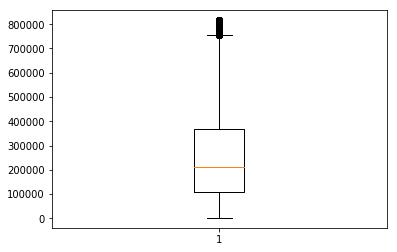

In [691]:
month_expenses1_client = trans_group1.groupby(['id_cliente',pd.Grouper(key='fecha', freq='1M')]).valor_trx.sum().reset_index() #Calcular gastos mensuales de cada cliente

month_expenses1_client = outlier_detection(month_expenses1_client, "valor_trx")
expenses = month_expenses1_client["valor_trx"]
plt.boxplot(expenses, showfliers = True)

##### Matriz de gasto mensual por cliente

In [692]:
month_expenses_group1 = month_expenses1_client.pivot(index='id_cliente', columns='fecha', values='valor_trx') #Crear matriz clienteXmes
month_expenses_group1.columns = month_expenses_group1.columns.strftime('%b/%Y') #Convertir fecha a formato mes/YYYY
month_expenses_group1 = month_expenses_group1.fillna(0) #Cuando un cliente no hizo transacciones en un mes, la casilla se llena con un cero
month_expenses_group1

,Sep/2016,Oct/2016,Nov/2016,Dec/2016,Jan/2017,Feb/2017,Mar/2017,Apr/2017,May/2017,Jun/2017,...,Jan/2018,Feb/2018,Mar/2018,Apr/2018,May/2018,Jun/2018,Jul/2018,Aug/2018,Sep/2018,Oct/2018
id_cliente,,,,,,,,,,,,,,,,,,,,,
34,0.00,0.00,0.00,0.00,0.00,0.00,348692.48,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,67599.24,0.00
127,0.00,0.00,0.00,0.00,0.00,0.00,152505.14,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
165,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,296670.66,0.00,0.00
209,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,451917.08,0.00,229643.14,234158.96,249979.78,256986.80,255950.04,245816.37,252481.18
238,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,150925.40,0.00
262,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,533043.19,0.00,755909.77,0.00,0.00,0.00,0.00,163893.28,0.00,0.00
303,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,426981.91,0.00
308,26755.06,27314.90,0.00,0.00,0.00,0.00,0.00,0.00,267231.63,0.00,...,0.00,0.00,0.00,59445.81,91766.15,0.00,151343.76,0.00,0.00,0.00
317,0.00,0.00,0.00,137968.49,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#### Filtrado de clientes por número de meses con transacciones

In [693]:
month_diff1_thres = 24

In [694]:
thresh_mask1 = month_expenses_group1.astype(bool).sum(axis=1) >= month_diff1_thres #Obtiene numero de meses con gasto diferente de 0 para cada cliente
month_expenses_filtered1 = month_expenses_group1[thresh_mask1]
month_expenses_filtered1

,Sep/2016,Oct/2016,Nov/2016,Dec/2016,Jan/2017,Feb/2017,Mar/2017,Apr/2017,May/2017,Jun/2017,...,Jan/2018,Feb/2018,Mar/2018,Apr/2018,May/2018,Jun/2018,Jul/2018,Aug/2018,Sep/2018,Oct/2018
id_cliente,,,,,,,,,,,,,,,,,,,,,
5323,22990.98,22333.00,22172.61,22140.93,27166.82,20255.91,0.00,118118.21,94534.19,64418.31,...,248383.78,55394.98,315811.20,182507.27,184862.12,188536.53,123390.13,83391.92,89965.38,0.00
5908,100743.55,99137.39,102501.59,104761.79,295490.69,101087.36,103484.57,103594.99,100550.25,99185.67,...,98542.18,99745.97,103793.36,105868.00,99523.88,106572.69,106579.24,103492.41,104029.65,0.00
6423,136285.96,119800.21,123893.27,122715.06,134773.45,115389.13,125789.40,116566.43,118785.81,107528.10,...,117554.60,105742.09,118234.58,117365.56,120796.99,109868.96,113062.96,114360.23,108823.82,0.00
7831,338650.05,317922.42,339160.99,368989.16,363700.63,350371.67,374381.71,349293.93,350127.20,379393.62,...,395299.52,386210.66,389927.68,376412.72,407861.96,389971.50,407422.59,389313.56,408892.16,0.00
9899,493761.41,219126.48,217400.60,356381.35,446573.97,416140.43,381050.49,393496.63,395791.98,155312.03,...,500370.70,489626.73,479965.10,494278.27,481367.03,468130.25,455347.74,209567.39,191304.40,0.00
12173,309250.13,319841.93,110310.15,747624.58,57002.37,351533.15,707084.31,395453.44,771667.31,85516.78,...,81859.01,314245.54,484600.41,449757.36,292287.28,180706.57,355250.74,102943.82,269414.61,0.00
12265,18765.70,30599.06,32205.47,30561.24,212225.09,54692.97,52678.37,53000.09,53435.60,57413.96,...,34469.60,31778.55,32732.02,32173.51,32805.52,33458.62,34203.59,33437.31,32648.62,0.00
12790,77785.23,0.00,74419.89,114424.57,143040.32,123282.20,199444.47,206860.80,96492.03,94395.23,...,265596.65,236038.74,145841.29,145666.06,204876.18,256701.26,474558.27,338484.42,208250.62,0.00
17386,319170.26,361284.80,448735.03,370567.50,0.00,501685.00,76117.70,706096.46,288715.51,664513.21,...,64825.97,55589.76,430492.43,106587.06,45465.27,51463.98,46555.80,165174.30,185538.73,0.00


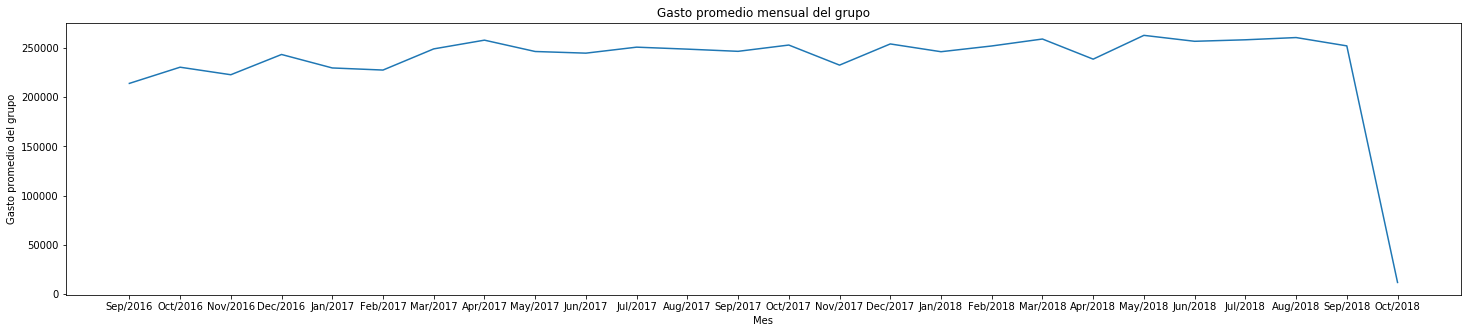

In [695]:
plt.figure(figsize=(25,5))
plt.plot(month_expenses_filtered1.mean())
plt.xlabel('Mes')
plt.ylabel('Gasto promedio del grupo')
plt.title('Gasto promedio mensual del grupo')
plt.show()

#### Construcción del dataset

Se tomarán los meses entre _sep/2017_ y _sep/2018_, ya que son para los que se tienen datos del mes anterior. _oct/2018_ no cuenta con suficientes transacciones.

In [696]:
month_expenses_filtered1_arr = np.array(month_expenses_filtered1)
total_expenses_dataset1_in = []
total_expenses_dataset1_out = []
for client in month_expenses_filtered1_arr:
    """"""
    for i in range(12, 25): #Se toma desde sep/2017 hasta sep/2018
        #Toma desde tres meses antes hasta uno antes (el slicing es abierto a la derecha). Ademas, concatena el mismo mes del anio anterior
        total_expenses_dataset1_in.append(np.concatenate((client[i-3:i],client[i-12]), axis=None))
        #total_expenses_dataset0_in.append(client[i-12:i])
        total_expenses_dataset1_out.append(client[i])
    
    #total_expenses_dataset0_in.append(client[0:24])
    #total_expenses_dataset0_out.append(client[24])
    #break

In [697]:
total_expenses_dataset1_in = np.array(total_expenses_dataset1_in)

In [698]:
total_expenses_dataset1_out = np.array(total_expenses_dataset1_out)


In [699]:
print("Número de muestras:")

len(total_expenses_dataset1_in) #No. clientes x 13 (no. meses tomados)

Número de muestras:


2093

##### Escalado de datos a un rango de 0 a 1

In [700]:
from sklearn.preprocessing import MinMaxScaler

scalerIn1 = MinMaxScaler()
scalerOut1 = MinMaxScaler()

total_exp_dset1_in_scaled = scalerIn1.fit_transform(total_expenses_dataset1_in) #Escala los datos de cada caracteristica a un rango de 0 a 1
total_exp_dset1_out_scaled = scalerOut1.fit_transform(total_expenses_dataset1_out.reshape(-1, 1)) #Escala los datos de cada caracteristica a un rango de 0 a 1

#total_exp_dset0_in_scaled = total_expenses_dataset0_in
#total_exp_dset0_out_scaled = total_expenses_dataset0_out

##### División en conjuntos de entrenamiento y pruebas

In [701]:
from sklearn.model_selection import train_test_split

total_exp_dset1_in_train, total_exp_dset1_in_test, total_exp_dset1_out_train, total_exp_dset1_out_test = train_test_split(total_exp_dset1_in_scaled, total_exp_dset1_out_scaled, test_size=0.25, random_state=42)

#### Implementación del método de predicción

##### Regresión usando perceptrón multicapa

In [702]:
from sklearn.neural_network import MLPRegressor

mlpReg1 = MLPRegressor(hidden_layer_sizes=(3,), activation='logistic', learning_rate='invscaling', early_stopping=True,
                     max_iter=600)
mlpReg1.fit(total_exp_dset1_in_scaled, total_exp_dset1_out_scaled.ravel())

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(3,), learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=600, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

###### Evaluación del modelo

In [703]:
print("R2 Score:")

mlpReg1.score(total_exp_dset1_in_test, total_exp_dset1_out_test)

#scores = [mlpRegs[i].score(total_exp_dset0_in_test, total_exp_dset0_out_test) for i in range(len(mlpRegs))]

R2 Score:


0.5748590190294209

In [704]:
#Predicciones para set de prueba

mlp_predictions1 = mlpReg1.predict(total_exp_dset1_in_test)

In [705]:
from sklearn.metrics import explained_variance_score

print("Explained Variance Score:")
explained_variance_score(total_exp_dset1_out_test, mlp_predictions1)

Explained Variance Score:


0.5749883636496916

In [706]:
from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error:")
print(scalerOut1.inverse_transform(mean_absolute_error(total_exp_dset1_out_test, mlp_predictions1).reshape(1,-1)))
#mean_absolute_error(total_exp_dset0_out_test, mlp_predictions).reshape(1,-1)

Mean Absolute Error:
[[69382.92093154]]


In [707]:
total_exp1_out_test_unscaled = scalerOut1.inverse_transform(total_exp_dset1_out_test.reshape(-1, 1))
mlp_predictions1_unscaled = scalerOut1.inverse_transform(mlp_predictions1.reshape(-1, 1))

#Ordenar los valores reales y las predicciones de acuerdo a los valores reales
sorting_indexes1 = np.argsort(total_exp1_out_test_unscaled.ravel()) #Obtener indices de ordenamiento de valores reales
total_exp1_out_test_unscaled = np.array(total_exp1_out_test_unscaled)[sorting_indexes1].ravel() #Ordenar valores reales
mlp_predictions1_unscaled = np.array(mlp_predictions1_unscaled)[sorting_indexes1].ravel() #Ordenar predicciones

#Calcular distribución del error absoluto
dist_abs_error1 = abs( np.subtract(total_exp1_out_test_unscaled, mlp_predictions1_unscaled) )

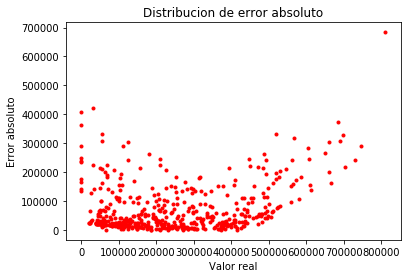

In [708]:
#Graficar distribución del error absoluto

plt.plot(total_exp1_out_test_unscaled, dist_abs_error1, 'r.')
plt.xlabel('Valor real')
plt.ylabel('Error absoluto')
plt.title('Distribucion de error absoluto')
plt.show()

Text(0.5, 1.0, 'Histograma de error absoluto')

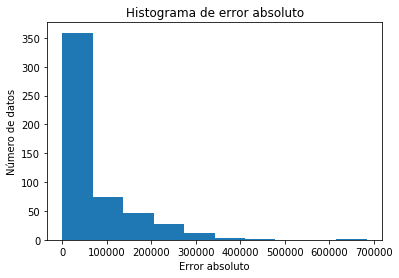

In [709]:
plt.hist(dist_abs_error1, bins=10)#bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000], align='left')
plt.xlabel('Error absoluto')
plt.ylabel('Número de datos')
plt.title('Histograma de error absoluto')

In [710]:
max_error_index1 = np.argmax(dist_abs_error1)
print("Error Absoluto Máximo:")
print(dist_abs_error1.max())
print("Gasto real correspondiente al error absoluto máximo:")
print(total_exp1_out_test_unscaled[max_error_index1])
print("Predicción correspondiente al error absoluto máximo:")
print(mlp_predictions1_unscaled[max_error_index1])

Error Absoluto Máximo:
683898.83228888
Gasto real correspondiente al error absoluto máximo:
810546.87
Predicción correspondiente al error absoluto máximo:
126648.03771111995


In [711]:
#Calculo de RPD (Relative Percent Difference) 

RPD1 = 2 * np.divide( np.subtract(total_exp1_out_test_unscaled, mlp_predictions1_unscaled), np.add(abs(total_exp1_out_test_unscaled), abs(mlp_predictions1_unscaled)) )

print("RPD Medio:")
print(RPD1.mean())
print("RPD Absoluto Medio:")
print(abs(RPD1).mean())

RPD Medio:
-0.13665494246982599
RPD Absoluto Medio:
0.3362119233679971


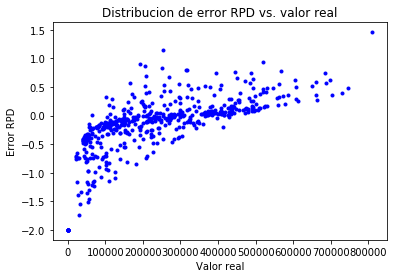

In [732]:
plt.plot(total_exp1_out_test_unscaled, RPD1, 'b.')
plt.xlabel('Valor real')
plt.ylabel('Error RPD')
plt.title('Distribucion de error RPD vs. valor real')
plt.show()

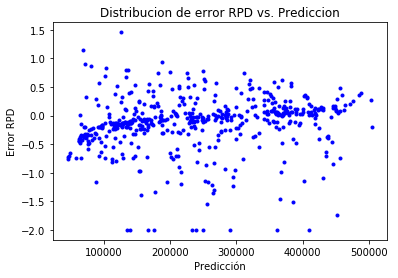

In [731]:
plt.plot(np.sort(mlp_predictions1_unscaled), RPD1[np.argsort(mlp_predictions1_unscaled)], 'b.')
plt.xlabel('Predicción')
plt.ylabel('Error RPD')
plt.title('Distribucion de error RPD vs. Prediccion')
plt.show()

Text(0.5, 1.0, 'Histograma de error RPD')

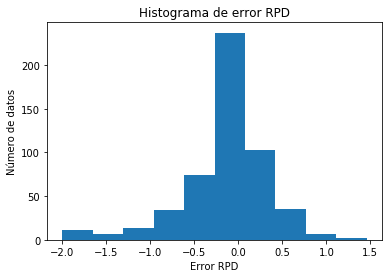

In [714]:
plt.hist(RPD1)#, bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000], align='left')
plt.xlabel('Error RPD')
plt.ylabel('Número de datos')
plt.title('Histograma de error RPD')

### Grupo 2

#### Transacciones mensuales por cliente

In [737]:
trans_group2 = data_clients_group_demog.get_group(2)

In [738]:
print("Maximo de transacciones por mes para cada cliente:")
trans_group2.groupby(['id_cliente',pd.Grouper(key='fecha', freq='1M')]).valor_trx.value_counts().max()

Maximo de transacciones por mes para cada cliente:


2

##### Detección de datos atípicos en el gasto mensual por cliente

{'whiskers': [<matplotlib.lines.Line2D at 0x201dcc09320>,
 'caps': [<matplotlib.lines.Line2D at 0x201dcc099b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x201dcc01eb8>],
 'medians': [<matplotlib.lines.Line2D at 0x201dcc09dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x201dcc143c8>],
 'means': []}

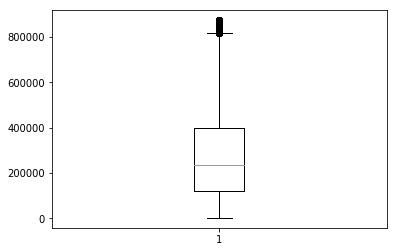

In [739]:
month_expenses2_client = trans_group2.groupby(['id_cliente',pd.Grouper(key='fecha', freq='1M')]).valor_trx.sum().reset_index() #Calcular gastos mensuales de cada cliente

month_expenses2_client = outlier_detection(month_expenses2_client, "valor_trx")
expenses = month_expenses2_client["valor_trx"]
plt.boxplot(expenses, showfliers = True)

##### Matriz de gasto mensual por cliente

In [740]:
month_expenses_group2 = month_expenses2_client.pivot(index='id_cliente', columns='fecha', values='valor_trx') #Crear matriz clienteXmes
month_expenses_group2.columns = month_expenses_group2.columns.strftime('%b/%Y') #Convertir fecha a formato mes/YYYY
month_expenses_group2 = month_expenses_group2.fillna(0) #Cuando un cliente no hizo transacciones en un mes, la casilla se llena con un cero
month_expenses_group2

,Sep/2016,Oct/2016,Nov/2016,Dec/2016,Jan/2017,Feb/2017,Mar/2017,Apr/2017,May/2017,Jun/2017,...,Jan/2018,Feb/2018,Mar/2018,Apr/2018,May/2018,Jun/2018,Jul/2018,Aug/2018,Sep/2018,Oct/2018
id_cliente,,,,,,,,,,,,,,,,,,,,,
22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
113,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,249739.45,0.00,0.00,0.00,0.00,0.0
114,470533.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
117,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200348.96,...,0.00,0.00,0.00,0.00,0.00,109702.66,0.00,0.00,0.00,0.0
131,89056.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
156,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,207471.12,196440.63,187439.74,185806.56,189334.74,199897.37,186748.35,201117.11,188460.41,0.0
170,0.00,111604.19,74170.94,105650.38,75663.07,86338.19,0.00,79757.74,87246.52,98022.26,...,72665.70,89646.46,93121.59,81840.69,90628.99,97716.11,92028.23,86070.19,93412.91,0.0
198,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,148912.41,0.00,0.00,0.0
217,33087.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39241.75,0.00,0.0


#### Filtrado de clientes por número de meses con transacciones

In [741]:
month_diff2_thres = 24

In [742]:
thresh_mask2 = month_expenses_group2.astype(bool).sum(axis=1) >= month_diff2_thres #Obtiene numero de meses con gasto diferente de 0 para cada cliente
month_expenses_filtered2 = month_expenses_group2[thresh_mask2]
month_expenses_filtered2

,Sep/2016,Oct/2016,Nov/2016,Dec/2016,Jan/2017,Feb/2017,Mar/2017,Apr/2017,May/2017,Jun/2017,...,Jan/2018,Feb/2018,Mar/2018,Apr/2018,May/2018,Jun/2018,Jul/2018,Aug/2018,Sep/2018,Oct/2018
id_cliente,,,,,,,,,,,,,,,,,,,,,
851,161030.68,115389.69,102530.98,66350.48,91451.42,136489.05,123425.20,118780.79,115024.78,75625.09,...,0.00,135508.58,142585.11,138325.30,134137.66,128715.96,72793.01,72907.01,127571.14,0.00
4514,309254.91,318602.07,323208.01,321986.33,326897.76,326132.79,312120.98,338788.49,337891.56,336608.95,...,340142.19,333729.49,330819.33,328937.74,332003.36,323738.58,307980.95,319794.51,327359.71,0.00
6700,406065.09,357694.95,155718.12,182552.50,171253.37,164459.27,331298.99,387240.98,191471.22,204111.02,...,290058.64,255841.76,276037.42,267803.25,268778.85,265125.30,347591.47,529073.23,229636.47,0.00
8657,219112.72,341707.84,258018.43,216712.26,289113.69,205761.19,379888.64,283608.66,295383.51,287961.69,...,83186.22,0.00,163819.75,32565.74,74947.92,74439.43,81236.59,34515.50,34755.30,0.00
10050,718942.19,746473.42,746415.95,834991.96,797878.78,750407.79,497458.89,758532.84,409929.14,285634.42,...,312719.31,320685.03,322685.66,317587.67,320048.82,335582.05,9537.67,393975.84,244378.61,0.00
10450,223636.82,219440.80,222089.95,233015.57,805247.91,217728.72,230853.26,233096.04,0.00,434691.92,...,228351.60,232052.30,232597.37,230138.54,214318.99,215338.84,215663.26,231803.22,230456.39,0.00
11287,269904.95,257888.99,269381.95,100496.13,101465.75,347828.80,358170.77,368889.03,103478.00,359994.31,...,357832.88,320259.72,352382.30,366526.93,351376.81,359384.91,353067.04,355398.30,351879.90,0.00
11405,314987.89,271736.19,148655.12,142219.38,145003.94,153834.73,31910.13,130299.17,151965.45,156389.95,...,0.00,335020.25,171300.37,160574.46,167993.27,171359.86,171197.99,180671.50,192523.93,0.00
11944,445957.30,294757.61,129255.38,135262.50,74302.26,253600.18,307832.59,123886.75,306255.46,128701.87,...,128915.58,476260.21,584672.16,600537.68,658200.87,752012.22,364360.62,403329.19,736325.96,0.00


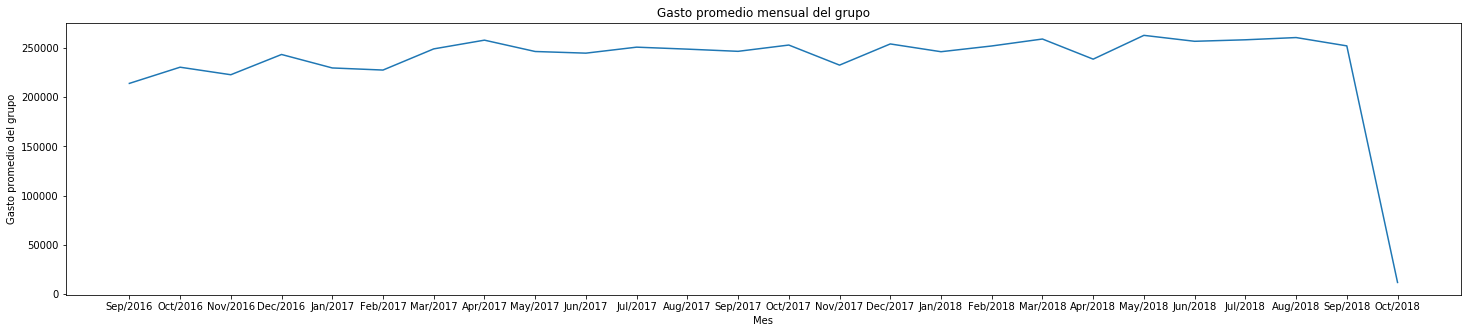

In [745]:
plt.figure(figsize=(25,5))
plt.plot(month_expenses_filtered1.mean())
plt.xlabel('Mes')
plt.ylabel('Gasto promedio del grupo')
plt.title('Gasto promedio mensual del grupo')
plt.show()

#### Construcción del dataset

Se tomarán los meses entre _sep/2017_ y _sep/2018_, ya que son para los que se tienen datos del mes anterior. _oct/2018_ no cuenta con suficientes transacciones.

In [746]:
month_expenses_filtered2_arr = np.array(month_expenses_filtered2)
total_expenses_dataset2_in = []
total_expenses_dataset2_out = []
for client in month_expenses_filtered2_arr:
    """"""
    for i in range(12, 25): #Se toma desde sep/2017 hasta sep/2018
        #Toma desde tres meses antes hasta uno antes (el slicing es abierto a la derecha). Ademas, concatena el mismo mes del anio anterior
        total_expenses_dataset2_in.append(np.concatenate((client[i-3:i],client[i-12]), axis=None))
        #total_expenses_dataset0_in.append(client[i-12:i])
        total_expenses_dataset2_out.append(client[i])
    
    #total_expenses_dataset0_in.append(client[0:24])
    #total_expenses_dataset0_out.append(client[24])
    #break

In [747]:
total_expenses_dataset2_in = np.array(total_expenses_dataset2_in)

In [748]:
total_expenses_dataset2_out = np.array(total_expenses_dataset2_out)


In [749]:
print("Número de muestras:")

len(total_expenses_dataset2_in) #No. clientes x 13 (no. meses tomados)

Número de muestras:


5291

##### Escalado de datos a un rango de 0 a 1

In [750]:
scalerIn2 = MinMaxScaler()
scalerOut2 = MinMaxScaler()

total_exp_dset2_in_scaled = scalerIn2.fit_transform(total_expenses_dataset2_in) #Escala los datos de cada caracteristica a un rango de 0 a 1
total_exp_dset2_out_scaled = scalerOut2.fit_transform(total_expenses_dataset2_out.reshape(-1, 1)) #Escala los datos de cada caracteristica a un rango de 0 a 1

#total_exp_dset0_in_scaled = total_expenses_dataset0_in
#total_exp_dset0_out_scaled = total_expenses_dataset0_out

##### División en conjuntos de entrenamiento y pruebas

In [751]:
total_exp_dset2_in_train, total_exp_dset2_in_test, total_exp_dset2_out_train, total_exp_dset2_out_test = train_test_split(total_exp_dset2_in_scaled, total_exp_dset2_out_scaled, test_size=0.25, random_state=42)

#### Implementación del método de predicción

##### Regresión usando perceptrón multicapa

In [752]:
mlpReg2 = MLPRegressor(hidden_layer_sizes=(3,), activation='logistic', learning_rate='invscaling', early_stopping=True,
                     max_iter=600)
mlpReg2.fit(total_exp_dset2_in_scaled, total_exp_dset2_out_scaled.ravel())

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(3,), learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=600, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

###### Evaluación del modelo

In [753]:
print("R2 Score:")

mlpReg2.score(total_exp_dset2_in_test, total_exp_dset2_out_test)

#scores = [mlpRegs[i].score(total_exp_dset0_in_test, total_exp_dset0_out_test) for i in range(len(mlpRegs))]

R2 Score:


0.4068289288000539

In [754]:
#Predicciones para set de prueba

mlp_predictions2 = mlpReg2.predict(total_exp_dset2_in_test)

In [755]:
print("Explained Variance Score:")

explained_variance_score(total_exp_dset2_out_test, mlp_predictions2)

Explained Variance Score:


0.4068443878404452

In [756]:
print("Mean Absolute Error:")
print(scalerOut2.inverse_transform(mean_absolute_error(total_exp_dset2_out_test, mlp_predictions2).reshape(1,-1)))
#mean_absolute_error(total_exp_dset0_out_test, mlp_predictions).reshape(1,-1)

Mean Absolute Error:
[[86910.80913698]]


In [758]:
total_exp2_out_test_unscaled = scalerOut2.inverse_transform(total_exp_dset2_out_test.reshape(-1, 1))
mlp_predictions2_unscaled = scalerOut2.inverse_transform(mlp_predictions2.reshape(-1, 1))

#Ordenar los valores reales y las predicciones de acuerdo a los valores reales
sorting_indexes2 = np.argsort(total_exp2_out_test_unscaled.ravel()) #Obtener indices de ordenamiento de valores reales
total_exp2_out_test_unscaled = np.array(total_exp2_out_test_unscaled)[sorting_indexes2].ravel() #Ordenar valores reales
mlp_predictions2_unscaled = np.array(mlp_predictions2_unscaled)[sorting_indexes2].ravel() #Ordenar predicciones

#Calcular distribución del error absoluto
dist_abs_error2 = abs( np.subtract(total_exp2_out_test_unscaled, mlp_predictions2_unscaled) )

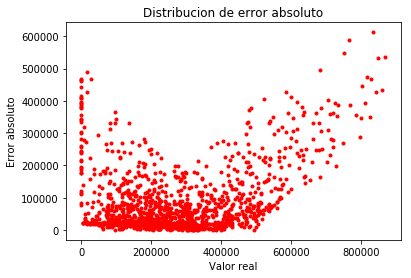

In [759]:
#Graficar distribución del error absoluto

plt.plot(total_exp2_out_test_unscaled, dist_abs_error2, 'r.')
plt.xlabel('Valor real')
plt.ylabel('Error absoluto')
plt.title('Distribucion de error absoluto')
plt.show()

Text(0.5, 1.0, 'Histograma de error absoluto')

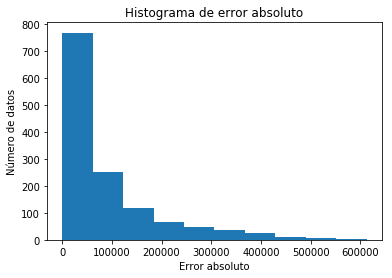

In [760]:
plt.hist(dist_abs_error2, bins=10)#bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000], align='left')
plt.xlabel('Error absoluto')
plt.ylabel('Número de datos')
plt.title('Histograma de error absoluto')

In [761]:
max_error_index2 = np.argmax(dist_abs_error2)
print("Error Absoluto Máximo:")
print(dist_abs_error2.max())
print("Gasto real correspondiente al error absoluto máximo:")
print(total_exp2_out_test_unscaled[max_error_index2])
print("Predicción correspondiente al error absoluto máximo:")
print(mlp_predictions2_unscaled[max_error_index2])

Error Absoluto Máximo:
612775.4711571366
Gasto real correspondiente al error absoluto máximo:
834690.19
Predicción correspondiente al error absoluto máximo:
221914.7188428633


In [762]:
#Calculo de RPD (Relative Percent Difference)

RPD2 = 2 * np.divide( np.subtract(total_exp2_out_test_unscaled, mlp_predictions2_unscaled), np.add(abs(total_exp2_out_test_unscaled), abs(mlp_predictions2_unscaled)) )

print("RPD Medio:")
print(RPD2.mean())
print("RPD Absoluto Medio:")
print(abs(RPD2).mean())

RPD Medio:
-0.13471018801359613
RPD Absoluto Medio:
0.3561937912469949


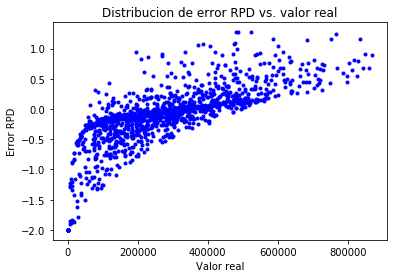

In [764]:
plt.plot(total_exp2_out_test_unscaled, RPD2, 'b.')
plt.xlabel('Valor real')
plt.ylabel('Error RPD')
plt.title('Distribucion de error RPD vs. valor real')
plt.show()

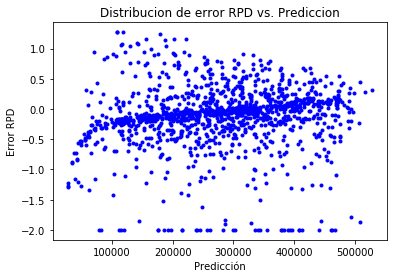

In [765]:
plt.plot(np.sort(mlp_predictions2_unscaled), RPD2[np.argsort(mlp_predictions2_unscaled)], 'b.')
plt.xlabel('Predicción')
plt.ylabel('Error RPD')
plt.title('Distribucion de error RPD vs. Prediccion')
plt.show()

Text(0.5, 1.0, 'Histograma de error RPD')

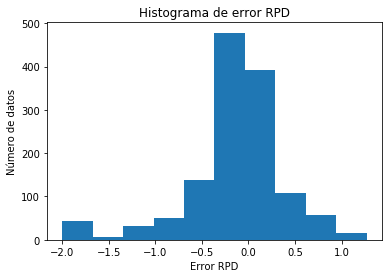

In [766]:
plt.hist(RPD2)#, bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000], align='left')
plt.xlabel('Error RPD')
plt.ylabel('Número de datos')
plt.title('Histograma de error RPD')